# Lending Club Case Study
## -- *By Abhishek Mukherjee and Abhishek Shukla*

### 1. Problem Statement:
We are given a dataset about a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### 2. Data Collection

In [1]:
# Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the loan dataset for EDA. The loan file is in same directory as the ipynb notebook

loan_df = pd.read_csv("loan.csv")
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",500)

In [3]:
# Check if data is correctly loaded or any errors
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### 3. Data Exploration and Cleaning

In [4]:
# Get dataset information (info), shape, and data types

# Dataset info with verbose option to display all columns
loan_df.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [5]:
dataset_shape = loan_df.shape  #rows and columns
data_types = loan_df.dtypes #data types - dtypes
print("\nDataset Shape:", dataset_shape)


Dataset Shape: (39717, 111)


In [6]:
print("\nData Types:")
print(data_types)


Data Types:
id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state           

In [7]:
# Check null values and percentages

null_values = loan_df.isnull().sum()
print ("Null Values in each column:")
null_values

Null Values in each column:


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
# Compute null/NaN percentages
null_perc = round(loan_df.isnull().mean()*100, 2)
print ("Null Percentages in each column:")
null_perc

Null Percentages in each column:


id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [9]:
# Drop all columns where missing values are greater than 30% i.e. retain all columns with less than 30% missing values
loan_df_clean = loan_df.loc[:,loan_df.isnull().mean()*100 < 30]

In [10]:
# Find out the missing values after dropping columns with mostly missing data
missing_value_perc = round(loan_df_clean.isnull().mean()*100,2)
print("Missing data percent greater than 0:")
missing_value_perc[missing_value_perc > 0]

Missing data percent greater than 0:


emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [11]:
loan_df_clean.shape

(39717, 53)

In [12]:
# Lets also check missing values from rows which has more than 5 missing values
loan_df_clean[loan_df_clean.isnull().sum(axis=1) > 5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


Looks like there are no rows which has more than 5 columns with missing values

In [13]:
# Lets also check missing values from rows which has more than 4 missing values but less than 5
loan_df_clean[(loan_df_clean.isnull().sum(axis=1) > 4) & (loan_df_clean.isnull().sum(axis=1) <=5)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39659,121568,121574,4000,4000,1925.0,36 months,9.64%,128.41,B,B4,NaN,< 1 year,NONE,100000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Refinancing high interest loan,950xx,CA,15.00,0,May-99,1,6,0,8155,14.90%,8,f,0.0,0.0,4622.489229,2224.58,4000.0,622.49,0.0,0.0,0.0,Sep-10,129.76,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39660,121535,121373,2800,2800,1625.0,36 months,8.70%,88.65,B,B1,NaN,< 1 year,NONE,120000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Baby is coming,024xx,MA,15.00,0,May-99,1,6,0,8155,14.90%,8,f,0.0,0.0,3191.218575,1852.05,2800.0,391.22,0.0,0.0,0.0,Sep-10,89.80,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39700,98276,98268,5400,5400,200.0,36 months,7.75%,168.60,A,A3,NaN,< 1 year,RENT,8000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,educational,Help with college expenses,306xx,GA,3.00,0,Mar-89,0,4,0,1321,16.50%,4,f,0.0,0.0,6069.341452,224.80,5400.0,669.34,0.0,0.0,0.0,Jul-10,169.09,Dec-13,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39704,93277,93254,3000,3000,950.0,36 months,8.70%,94.98,B,B1,NaN,< 1 year,MORTGAGE,25000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Home Based Bakery,017xx,MA,14.54,0,Sep-00,1,10,0,3660,7.80%,13,f,0.0,0.0,3419.144850,1082.73,3000.0,419.14,0.0,0.0,0.0,Jul-10,97.45,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39706,92676,92671,5000,5000,150.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,180000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,remodelin my kitchen,530xx,WI,5.55,0,Jun-96,0,12,0,40934,26.30%,39,f,0.0,0.0,5645.957239,169.38,5000.0,645.96,0.0,0.0,0.0,Jul-10,157.31,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


We will retain these rows as the missing values are in columns which don't seem very significant at this point for analysis.

In [14]:
# Lets check the 'emp_title' and 'emp_length' columns
loan_df_clean['emp_title'].value_counts()

US Army                                   134
Bank of America                           109
IBM                                        66
AT&T                                       59
Kaiser Permanente                          56
                                         ... 
The Grafton                                 1
Lauderdale County Board of Education        1
Clean Air Concepts Inc                      1
Washington State Department of Revenue      1
Yellowbook                                  1
Name: emp_title, Length: 28820, dtype: int64

The values seem to represent the organization or givernment department the employee works and are not a finite set of values from where the most frequently occuring one can be used for missing value imputation. The most frequently occuring value seem to be 'US Army' which will be assigned if we impute the missing values which doesn't seem reasonable. This column don't seem reasonable for analysis to answer the question of default indicator and for future default prediction purposes.

In [15]:
loan_df_clean = loan_df_clean.drop(columns=['emp_title'])

In [16]:
# Lets check the 'emp_length' column
loan_df_clean['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [17]:
loan_df_clean['emp_length'].agg('mode')[0]

'10+ years'

We will impute the missing values with mode of the column data

In [18]:
loan_df_clean['title'].value_counts()

Debt Consolidation                        2184
Debt Consolidation Loan                   1729
Personal Loan                              659
Consolidation                              517
debt consolidation                         505
                                          ... 
unexpected costs                             1
High Interest Credit Line                    1
New Consolidation                            1
First home 4 Fran                            1
Disability Leave Put My Family in Debt       1
Name: title, Length: 19615, dtype: int64

The 'title' column will need significant cleaning as we can clearly see that its a free text entry of loan title. There is no point in imputing missing values or using this column for analysis

In [19]:
# Lets check the 'term' column
loan_df_clean['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

We need to change it to a numerical column type

In [20]:
# Remove the months text
loan_df_clean['term'] = loan_df_clean['term'].apply(lambda x: int(x[:3]))

In [21]:
loan_df_clean['term'].value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [22]:
# Lets check the 'int_rate' column type
loan_df_clean['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
7.49%     656
11.71%    607
9.99%     603
7.90%     582
5.42%     573
11.99%    532
12.69%    491
10.37%    468
6.03%     447
12.99%    446
8.49%     445
12.42%    442
10.65%    435
5.79%     410
8.90%     402
7.29%     397
6.62%     396
11.86%    391
14.27%    390
10.59%    380
9.63%     378
9.91%     377
5.99%     347
7.14%     341
6.99%     336
11.11%    331
12.53%    327
16.77%    327
10.74%    312
6.54%     305
6.91%     303
8.94%     294
7.66%     292
13.61%    291
15.99%    286
13.98%    284
13.23%    263
11.12%    259
13.99%    257
6.17%     252
10.00%    251
12.68%    251
10.36%    250
10.75%    250
11.36%    247
16.49%    241
11.83%    233
18.25%    230
10.62%    228
14.65%    222
13.06%    220
10.38%    219
10.25%    218
15.23%    215
14.96%    214
16.89%    209
15.65%    208
11.14%    206
6.92%     204
12.18%    203
17.27%    203
15.27%    200
15.95%    199
16.32%    198
14.79%    192
8.00%     191
17.49%

We need to remove the '%' from the end of the percent value

In [23]:
loan_df_clean['int_rate'] = loan_df_clean['int_rate'].apply(lambda x: float(x[0:-1]) if x[-1] == '%' else float(x))

In [24]:
loan_df_clean['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
7.49     656
11.71    607
9.99     603
7.90     582
5.42     573
11.99    532
12.69    491
10.37    468
6.03     447
12.99    446
8.49     445
12.42    442
10.65    435
5.79     410
8.90     402
7.29     397
6.62     396
11.86    391
14.27    390
10.59    380
9.63     378
9.91     377
5.99     347
7.14     341
6.99     336
11.11    331
12.53    327
16.77    327
10.74    312
6.54     305
6.91     303
8.94     294
7.66     292
13.61    291
15.99    286
13.98    284
13.23    263
11.12    259
13.99    257
6.17     252
12.68    251
10.00    251
10.36    250
10.75    250
11.36    247
16.49    241
11.83    233
18.25    230
10.62    228
14.65    222
13.06    220
10.38    219
10.25    218
15.23    215
14.96    214
16.89    209
15.65    208
11.14    206
6.92     204
17.27    203
12.18    203
15.27    200
15.95    199
16.32    198
14.79    192
8.00     191
17.49    190
15.21    187
12.73    187
9.62     186
15.58    185
9.32     184

In [25]:
loan_df_clean.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [26]:
# Lets impute remaining missing values.
# For numerical columns we will impute with median
numerical_columns = loan_df_clean.select_dtypes(include=["float64","int64"]).columns
loan_df_clean[numerical_columns] = (loan_df_clean[numerical_columns]
                                    .apply(lambda column:column.fillna(column.median())))


In [27]:
# For categorical columns we will impute with mode
categorical_columns = loan_df_clean.select_dtypes(include=["object"]).columns
loan_df_clean[categorical_columns] = (loan_df_clean[categorical_columns]
                                      .apply(lambda column:column.fillna(column.mode()[0])))

In [28]:
# Find out the missing values after dropping columns with mostly missing data
missing_value_perc = round(loan_df_clean.isnull().mean()*100,2)
missing_value_perc[missing_value_perc > 0]

Series([], dtype: float64)

In [29]:
loan_df_clean.shape

(39717, 52)

So the missing data has been imputed. Now we have to proceed to find outliers and filter the columns and rows for analysis (Univariate, Bivariate and Multivariate Analysis)

## Univariate Analysis

In [30]:
#Lets look at loan_status column
loan_df_clean['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

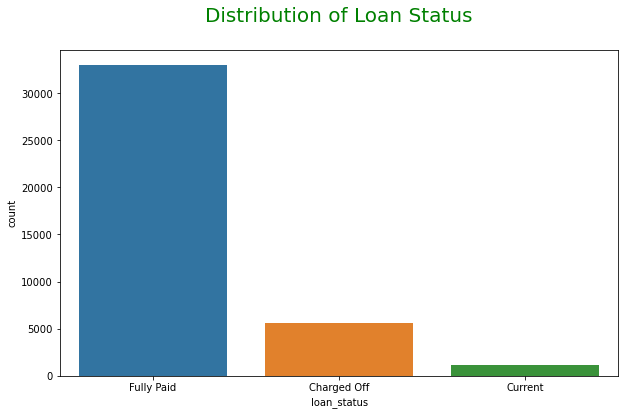

In [31]:
plt.figure(figsize=[10,6])
sns.countplot(data=loan_df_clean, x='loan_status')
plt.title("Distribution of Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

For our analysis, in order to analyze data to predict variables that indicate loan default we need to only filter data where the loan is either 'Fully Paid' off or 'Charged Off' i.e defaulted. The 'Current' category are in progress loans which can then use the analysis to predict future loan defaults (but is not necessary for now)

In [32]:
# Filtering rows where loan status is either 'Fully Paid' or 'Charged Off'
loan_df_filtered = loan_df_clean[loan_df_clean['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [33]:
loan_df_filtered['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

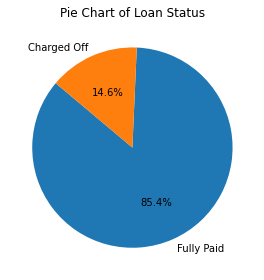

In [39]:
# lets compare the percentage of Fully paid vs defaults in the filtered dataset
loan_status_counts = loan_df_filtered['loan_status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Loan Status')

# Adjusting layout
plt.tight_layout()
plt.show()

**Note**: We will focus specifically on the charged off dataset to ascertain some of the reasons for defaults a little later.

Now we will analyze some more columns to understand their importance

The variables namely Loan Amount ('loan_amnt'), Interest Rate ('int_rate'), Annual Income ('annual_inc') are continuous/numerical variables so we will use histograms to check out their distribution for univariate analysis.

The variables namely Loan Term ('term'), Loan Grade ('grade') and Loan Sub Grade ('sub_grade') are categorical in nature so we will use countplot to visualize their distribution below.

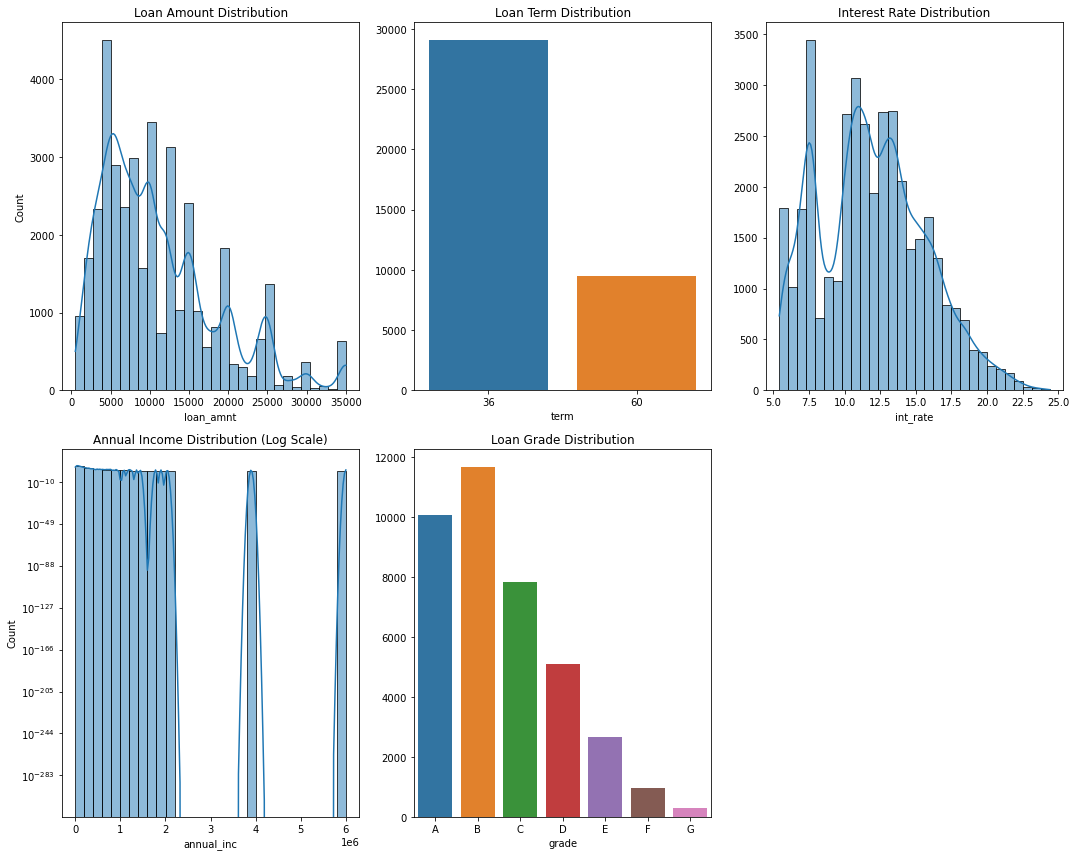

In [69]:
# Lets check out the visualizations of the aforementioned variables distribution
plt.figure(figsize=[15, 12])

# Loan Amount Distribution
plt.subplot(2, 3, 1)
sns.histplot(data=loan_df_filtered, x='loan_amnt', bins=30, kde=True)
plt.title('Loan Amount Distribution')

# Term Distribution
plt.subplot(2, 3, 2)
sns.countplot(data=loan_df_filtered, x='term' ).set(ylabel=None)
plt.title('Loan Term Distribution')

# Interest Rate Distribution
plt.subplot(2, 3, 3)
sns.histplot(data=loan_df_filtered, x='int_rate', bins=30, kde=True).set(ylabel=None)
plt.title('Interest Rate Distribution')

# Annual Income Distribution (log scale for clarity)
plt.subplot(2, 3, 4)
sns.histplot(data=loan_df_filtered, x='annual_inc', bins=30, kde=True)
plt.yscale('log')
plt.title('Annual Income Distribution (Log Scale)')

# Loan Grade Distribution
plt.subplot(2, 3, 5)
sns.countplot(data=loan_df_filtered, x='grade', order=sorted(loan_df_filtered['grade'].unique())).set(ylabel=None)
plt.title('Loan Grade Distribution')


plt.tight_layout()
plt.show()

The Loan Sub-Grade distribution is plotted separately to get a better view

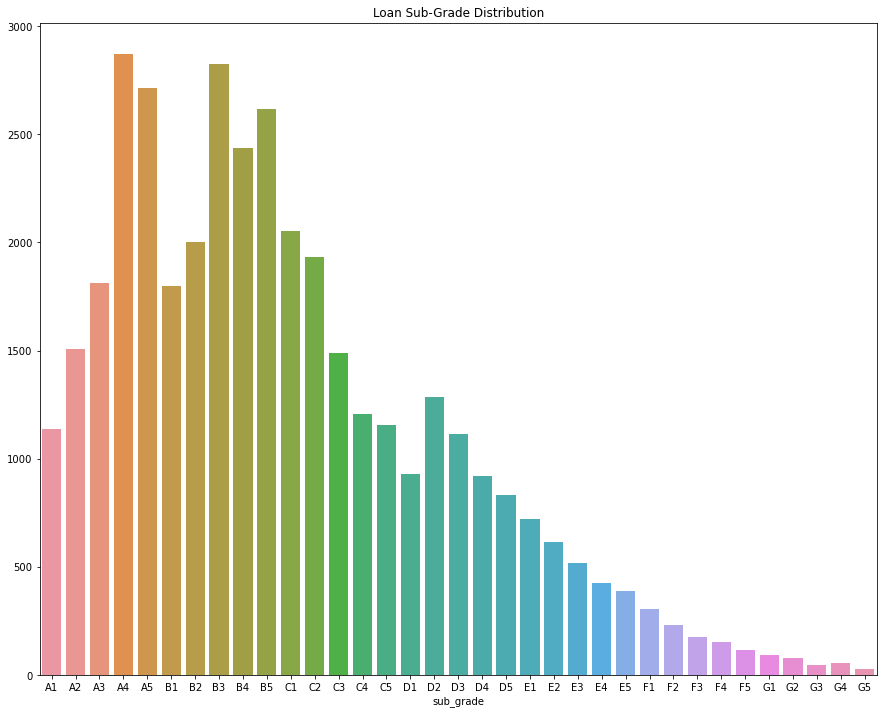

In [68]:
plt.figure(figsize=(15, 12))
sns.countplot(data=loan_df_filtered, x='sub_grade', order=sorted(loan_df_filtered['sub_grade'].unique())).set(ylabel=None)
plt.title('Loan Sub-Grade Distribution')
plt.show()

**Analysis**:

***Loan Amount Distribution***: From the above plot we can see that the highest amount of loans hivered around the 5000 mark and large loan amounts were less

***Loan Term Distribution***: The plot shows that more people opted for a 36 months term rather than 60 months term. We will have to correlate this with defaults to check which term category defaulted most

***Interest Rate Distribution***: The interest rate has some highs around 7.5 and between 10.0 - 12.0 %. This needs to be correlated with Loan Grade and Sub-Grades to see at which grades/sub-grades higher interest rates are offered and where the defaukts happen

For categorical variables:

***Annual Income Distribution***: We have taken a log scale for income. We see some clustering around the lower incomes i.e most people have incomes below 100k. Also it may be relevant that folks who take loan at lower income, higher installments and with a higher DTI (Debt to Income Ratio) could have a chance of default. We will need to further do some bivariate/multivariate correlation to arive at that notion convincingly.

***Loan Grade Distribution***: Loan grades are concentrated around A and B grades, reflecting higher creditworthiness. We need to check the loan grades of the defaulters

***Loan Sub-Grade Distribution***: The sub-grades A4, A5, B3, B4, B5, C1 and C2 are the most common.



The Loan Grade and Sub-Grades are analyzed separately to see the distribution of these in total loan amount.

In [70]:
sub_grade_counts = loan_df_filtered.groupby(['grade', 'sub_grade']).size().unstack().fillna(0)

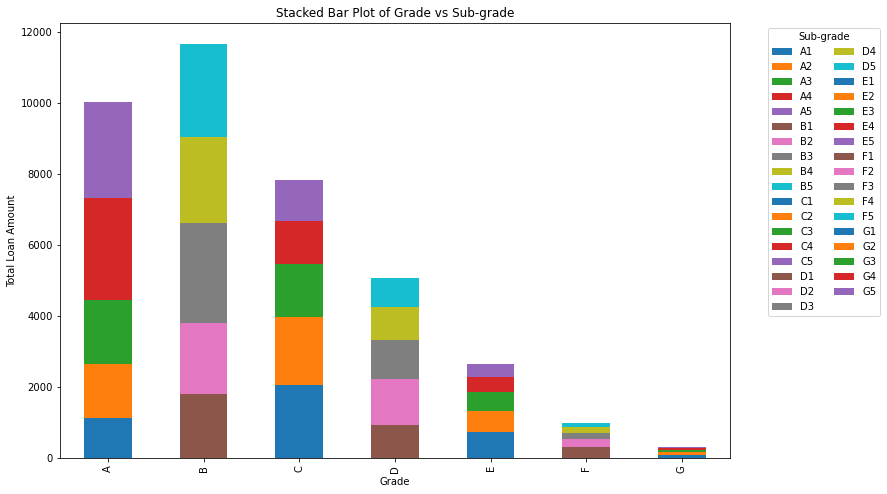

In [71]:
plt.figure(figsize=(12, 8))

# Create the stacked bar plot
sub_grade_counts.plot(kind='bar', stacked=True, ax=plt.gca())

# Move the legend outside the plot
plt.legend(title='Sub-grade', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2) 

plt.title('Stacked Bar Plot of Grade vs Sub-grade')
plt.xlabel('Grade')
plt.ylabel('Total Loan Amount')

plt.show()

Lets plot boxplots of the numerical variables to check for outliers

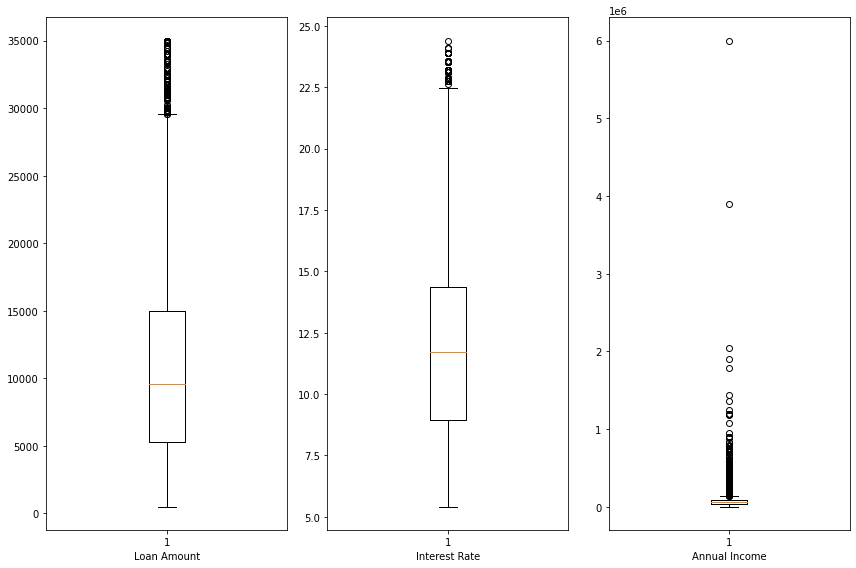

In [75]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.boxplot(data=loan_df_filtered, x='loan_amnt')
plt.xlabel('Loan Amount')

plt.subplot(1, 3, 2)
plt.boxplot(data=loan_df_filtered, x='int_rate')
plt.xlabel('Interest Rate')

plt.subplot(1, 3, 3)
plt.boxplot(data=loan_df_filtered, x='annual_inc')
plt.xlabel('Annual Income')

plt.tight_layout()
plt.show()

In [78]:
loan_df_filtered[['loan_amnt', 'int_rate', 'annual_inc']].describe()

,loan_amnt,int_rate,annual_inc
count,38577.000000,38577.000000,3.857700e+04
mean,11047.025430,11.932219,6.877797e+04
std,7348.441646,3.691327,6.421868e+04
min,500.000000,5.420000,4.000000e+03
25%,5300.000000,8.940000,4.000000e+04
50%,9600.000000,11.710000,5.886800e+04
75%,15000.000000,14.380000,8.200000e+04
max,35000.000000,24.400000,6.000000e+06


The above boxplots and the `describe()` function proves the observation of distributions earlier. We see a central tendency of Loan Amount around 10,000, Interest rate around 12% and Annual Income around 60k.

Some more columns of interest could be few numerical variables like Installment ('installment'), Revolving Balance ('revol_bal'), Revolving Line Utilization ('revol_util') and Debt-To-Income Ratio which tries to decipher the credit history of a person in terms of borrowing behaviour. We also try to see if the person has a Home Ownership which may indicate existing mortgages.

We will use Histograms for the numerical variables and countplot for the categorical one ('home_ownership')

Before that lets check the revol_util column if we need to clean any extra characters

In [87]:
loan_df_filtered['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

As we can see It has the '%' string which needs to be removed

In [88]:
loan_df_filtered['revol_util'] = loan_df_filtered['revol_util'].apply(lambda x: float(x[0:-1]) if x[-1] == '%' else float(x))

In [89]:
loan_df_filtered['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

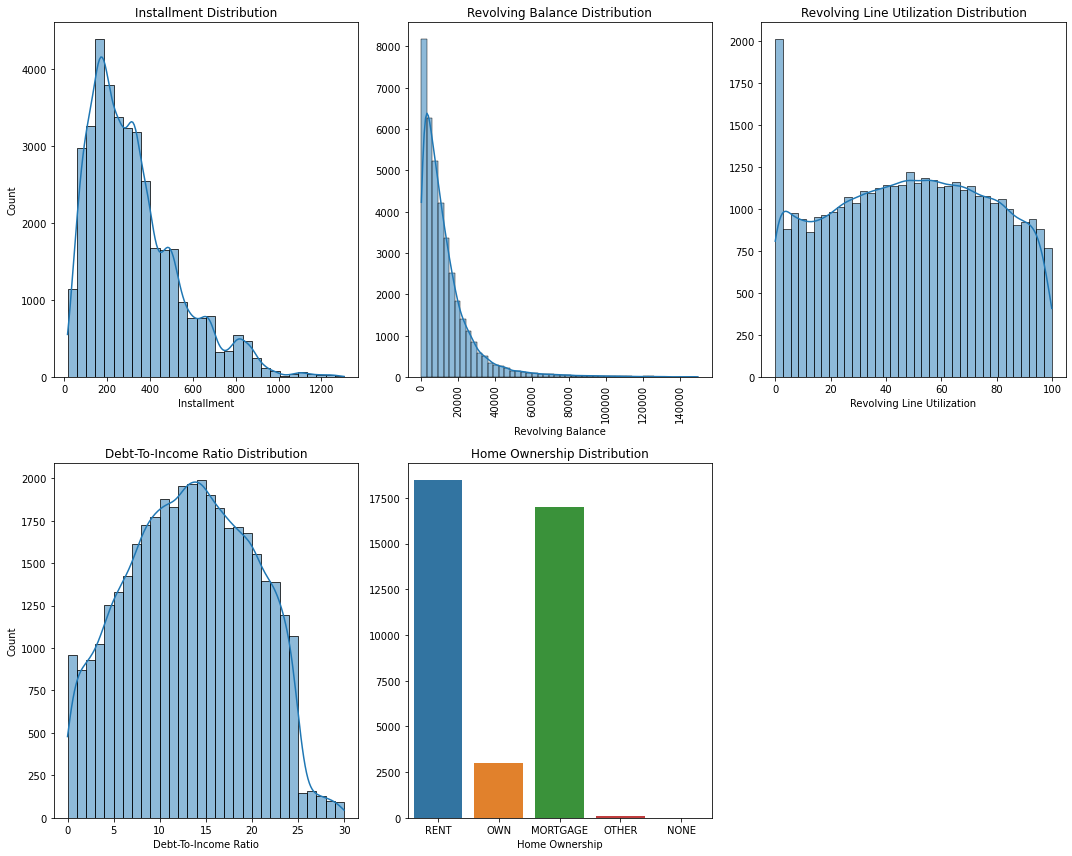

In [91]:
# Lets analyze the Installment, Revolving Balance, Revolving Utilization and Home Ownership for univariate analysis
plt.figure(figsize=(15, 12))

# Installment Distribution
plt.subplot(2, 3, 1)
sns.histplot(data=loan_df_filtered, x='installment', bins=30, kde=True)
plt.xlabel('Installment')
plt.title('Installment Distribution')

# Revolving Balance Distribution
plt.subplot(2, 3, 2)
sns.histplot(data=loan_df_filtered, x='revol_bal', bins=50, kde=True).set(ylabel=None)
plt.xticks(rotation=90)
plt.xlabel('Revolving Balance')
plt.title('Revolving Balance Distribution')

# Revolving Line Utilization Distribution
plt.subplot(2, 3, 3)
sns.histplot(data=loan_df_filtered, x='revol_util', kde=True).set(ylabel=None)
plt.title('Revolving Line Utilization Distribution')
plt.xlabel('Revolving Line Utilization')

# Debt-To-Income Ratio Distribution
plt.subplot(2, 3, 4)
sns.histplot(data=loan_df_filtered, x='dti', bins=30, kde=True)
plt.title('Debt-To-Income Ratio Distribution')
plt.xlabel('Debt-To-Income Ratio')

# Home Ownership Distribution
plt.subplot(2, 3, 5)
sns.countplot(data=loan_df_filtered, x='home_ownership').set(ylabel=None)
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership')


plt.tight_layout()
plt.show()

**Analysis**:

***Loan Installment Distribution***: The graph is right skewed and the maximum number of installaments seem to be around 200-300. 

***Revolving Balance***: The distribution of total credit revolving balances is highly skewed, with many borrowers having low to moderate balances, and a few borrowers with very high revolving balances. The long tail of the distribution suggests the presence of outliers

***Revolving Line Utilzation***: Revolving utilization (the percentage of available credit that is used) shows a distribution where many borrowers are using a moderate to high percentage of their available credit. It appears that some borrowers may even be using nearly all of their available credit (100% utilization)

***Home Ownership***: Most people borrowing are on rent. Now this may indicate they may be interested in applying for home mortgage/loan and that would need deeper analysis. The number of home owners with mortage is also high.

Lets plot the boxplot visualizations to detect outliers on installment, revolving credit balance and revolving credit utilization

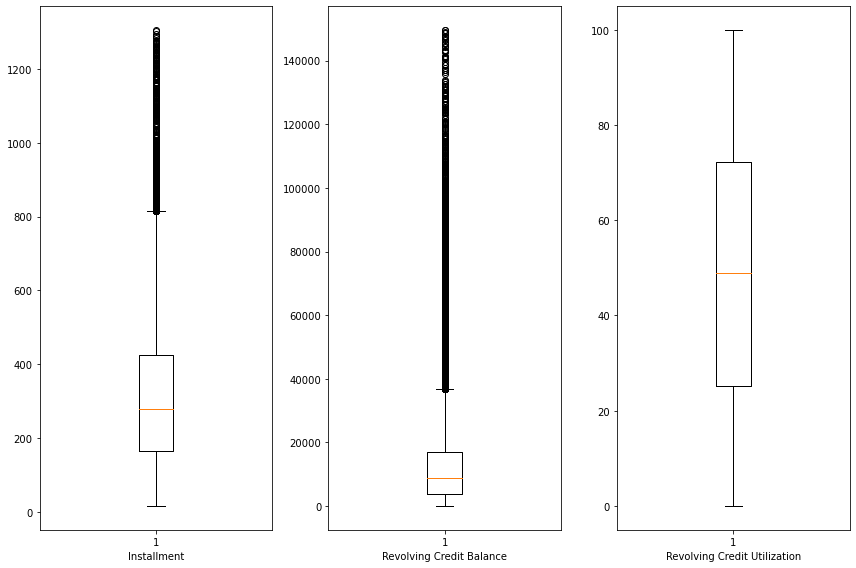

In [92]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.boxplot(data=loan_df_filtered, x='installment')
plt.xlabel('Installment')

plt.subplot(1, 3, 2)
plt.boxplot(data=loan_df_filtered, x='revol_bal')
plt.xlabel('Revolving Credit Balance')

plt.subplot(1, 3, 3)
plt.boxplot(data=loan_df_filtered, x='revol_util')
plt.xlabel('Revolving Credit Utilization')

plt.tight_layout()
plt.show()

In [93]:
loan_df_filtered[['installment', 'revol_bal', 'revol_util']].describe()

,installment,revol_bal,revol_util
count,38577.000000,38577.000000,38577.000000
mean,322.466318,13289.489826,48.639653
std,208.639215,15866.492241,28.400460
min,15.690000,0.000000,0.000000
25%,165.740000,3650.000000,25.100000
50%,277.860000,8762.000000,49.000000
75%,425.550000,16912.000000,72.200000
max,1305.190000,149588.000000,99.900000


For Installment, the central tendency is around 278 and there are a lot of outliers beyond 800 till around 1300. We need to check the interest rate, and annual income for these outliers. Typically a higher installment indicates a higher loan amount and interest which can only be afforded by people with higher income. Need to check if we have default cases here and observe the trend.

For Revolving Credit Balance, the central tendency is around 8700-9000 and a huge number of outliers beyond 34,000. We need to check if some of the loan defaulters have high credit revolving balance


For Revolving Credit Utilization a large number of folks have 49-50 % utilization and some even have upto 99.9 (max). We detect no outliers but in general its an evenly distributed plot which shows low to moderate credit utilization.